In [1]:
filepath = "names.txt"
words = open(filepath, 'r').read().splitlines()


In [2]:
import urllib
words = urllib.request.urlopen(
    'https://raw.githubusercontent.com/karpathy/makemore/master/names.txt'
    ).read().decode('utf-8').splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

In [7]:
unwanted_words = [" " ,"-" , "'"]
words = [i.lower() for i in words]
for k in unwanted_words:
    words = [i.replace(k,"") for i in words]    
words    
    

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [8]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [9]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [10]:
import torch

In [11]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [12]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [13]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [14]:

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ix1,ix2)
    N[ix1, ix2] += 1
    

0 5
5 13
13 13
13 1
1 0
0 15
15 12
12 9
9 22
22 9
9 1
1 0
0 1
1 22
22 1
1 0
0 9
9 19
19 1
1 2
2 5
5 12
12 12
12 1
1 0
0 19
19 15
15 16
16 8
8 9
9 1
1 0
0 3
3 8
8 1
1 18
18 12
12 15
15 20
20 20
20 5
5 0
0 13
13 9
9 1
1 0
0 1
1 13
13 5
5 12
12 9
9 1
1 0
0 8
8 1
1 18
18 16
16 5
5 18
18 0
0 5
5 22
22 5
5 12
12 25
25 14
14 0
0 1
1 2
2 9
9 7
7 1
1 9
9 12
12 0
0 5
5 13
13 9
9 12
12 25
25 0
0 5
5 12
12 9
9 26
26 1
1 2
2 5
5 20
20 8
8 0
0 13
13 9
9 12
12 1
1 0
0 5
5 12
12 12
12 1
1 0
0 1
1 22
22 5
5 18
18 25
25 0
0 19
19 15
15 6
6 9
9 1
1 0
0 3
3 1
1 13
13 9
9 12
12 1
1 0
0 1
1 18
18 9
9 1
1 0
0 19
19 3
3 1
1 18
18 12
12 5
5 20
20 20
20 0
0 22
22 9
9 3
3 20
20 15
15 18
18 9
9 1
1 0
0 13
13 1
1 4
4 9
9 19
19 15
15 14
14 0
0 12
12 21
21 14
14 1
1 0
0 7
7 18
18 1
1 3
3 5
5 0
0 3
3 8
8 12
12 15
15 5
5 0
0 16
16 5
5 14
14 5
5 12
12 15
15 16
16 5
5 0
0 12
12 1
1 25
25 12
12 1
1 0
0 18
18 9
9 12
12 5
5 25
25 0
0 26
26 15
15 5
5 25
25 0
0 14
14 15
15 18
18 1
1 0
0 12
12 9
9 12
12 25
25 0
0 5
5 12
12 5


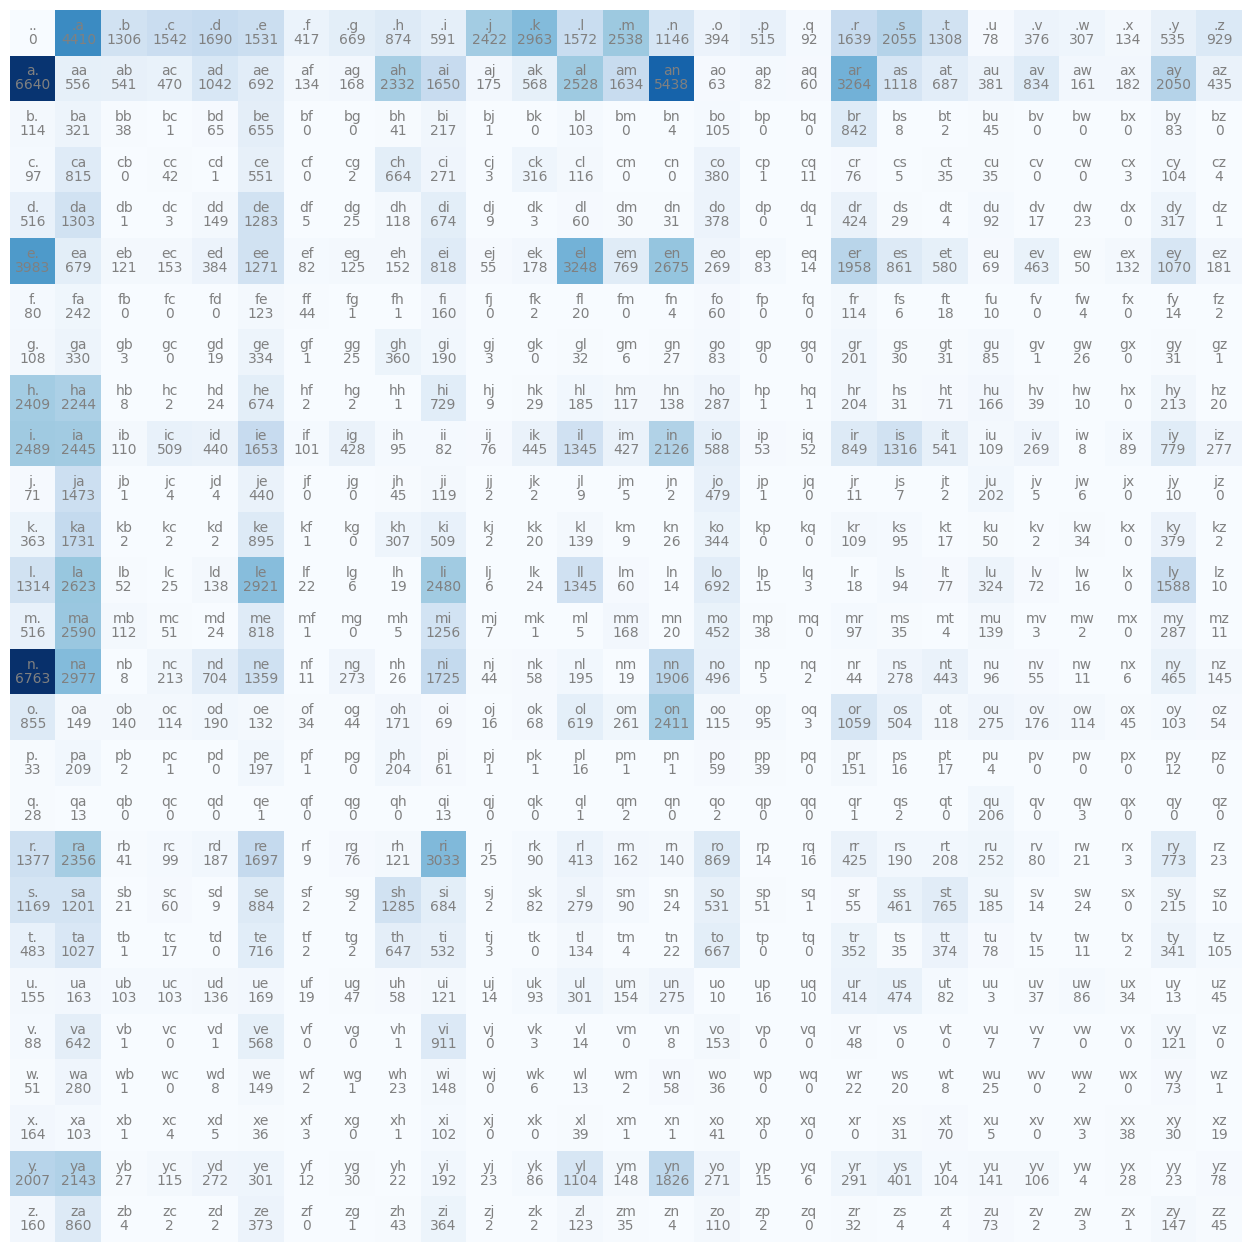

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [16]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [17]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [18]:
# To make things deterministic
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=10, replacement=True, generator=g)
''.join([itos[i.item()] for i in ix]) , ix

('msnaattamm', tensor([13, 19, 14,  1,  1, 20, 20,  1, 13, 13]))

In [19]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [20]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [21]:
p.shape

torch.Size([3])

In [22]:
a = torch.randn(4, 4)
a


tensor([[-0.2862, -0.1019, -0.7972,  1.2238],
        [-0.0174,  1.3863, -0.2660,  0.9142],
        [ 0.3408,  0.1933,  0.7536,  1.2666],
        [ 0.1798,  0.1198, -1.9616, -0.3689]])

In [23]:
# per row sum
a.sum(1 , keepdims = True) , a.sum(1 , keepdims = True).shape

(tensor([[ 0.0385],
         [ 2.0172],
         [ 2.5543],
         [-2.0309]]),
 torch.Size([4, 1]))

In [24]:
# per col sum
a.sum(0 , keepdims = True) , a.sum(0 , keepdims = True).shape

(tensor([[ 0.2171,  1.5975, -2.2712,  3.0357]]), torch.Size([1, 4]))

In [25]:
# In our case , we want per row sum and hence sum accrross dim 1 

In [26]:
N.sum(1)

tensor([32033, 33885,  2645,  3532,  5496, 20423,   905,  1927,  7616, 17701,
         2900,  5040, 13958,  6642, 18327,  7934,  1026,   272, 12700,  8106,
         5570,  3135,  2573,   929,   697,  9776,  2398])

In [27]:
N.sum(0)

tensor([32033, 33885,  2645,  3532,  5496, 20423,   905,  1927,  7616, 17701,
         2900,  5040, 13958,  6642, 18327,  7934,  1026,   272, 12700,  8106,
         5570,  3135,  2573,   929,   697,  9776,  2398])

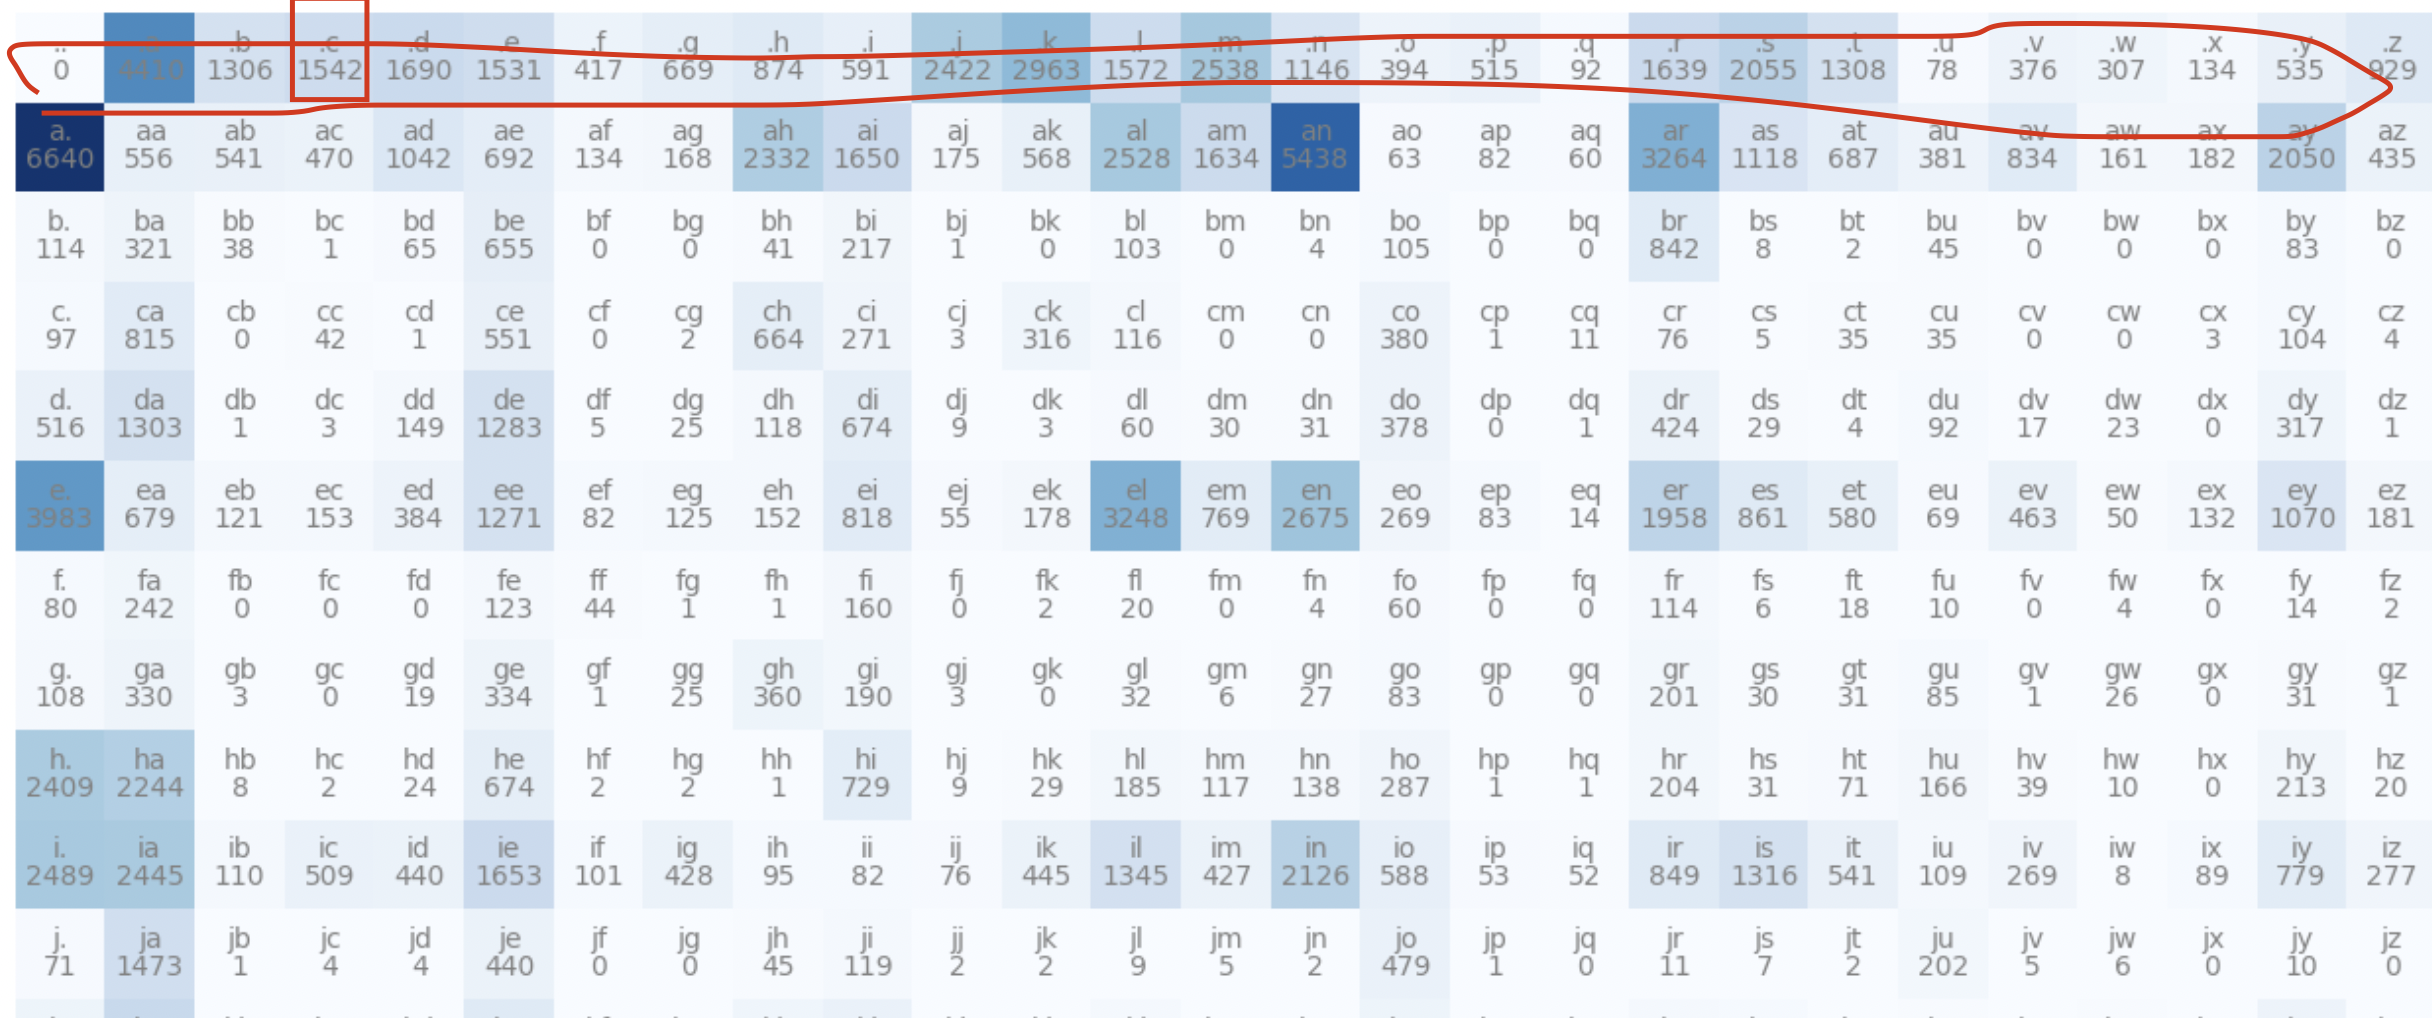

In [28]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [29]:
P.shape

torch.Size([27, 27])

In [30]:
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [31]:
# 27, 27
# 27,  1

In [32]:
P.sum(1).shape

torch.Size([27])

In [33]:
# 27, 27
#  1, 27

In [34]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [35]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [36]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [37]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [38]:
xs

tensor([ 0,  5, 13, 13,  1])

In [39]:
ys

tensor([ 5, 13, 13,  1,  0])

In [40]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [41]:
xenc.shape

torch.Size([5, 27])

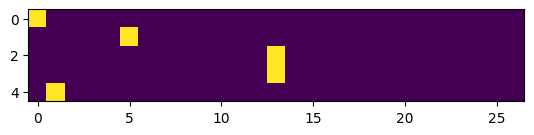

In [42]:
plt.imshow(xenc)

In [43]:
xenc.dtype

torch.float32

In [44]:
W = torch.randn((27, 27))
xenc @ W

tensor([[ 0.0438,  2.4883,  0.5843,  0.5036, -0.3922,  1.6119, -1.3740,  2.1646,
          1.9711,  2.5153, -0.6288, -1.4322,  0.9241, -0.5203, -0.5666, -0.8655,
          1.6582,  0.4507, -3.1923, -1.4284,  0.8795, -0.2306, -0.9908, -1.4070,
         -0.9197,  0.9384,  0.4357],
        [ 0.2517,  1.2760, -0.0040,  2.2639,  0.0732,  0.4076,  1.2302,  0.8718,
         -0.5361, -0.5136, -0.3871, -0.1802,  1.1587,  0.1872, -0.0224,  0.2720,
          1.5548, -0.8899,  1.4328, -0.2963,  2.0413,  0.1540, -0.9449, -1.1280,
         -1.2777,  0.7013, -0.2959],
        [ 0.8855, -0.8609,  0.3739,  0.7507, -2.1442,  0.6358, -0.0646,  0.0141,
          0.1703,  1.9868, -0.7636, -0.3230, -0.4878, -0.5301, -1.4307,  0.6942,
         -3.2081,  0.3663, -0.3713, -0.5776, -0.2633,  0.7369,  2.2766, -0.8602,
          1.8819, -0.0246, -0.1535],
        [ 0.8855, -0.8609,  0.3739,  0.7507, -2.1442,  0.6358, -0.0646,  0.0141,
          0.1703,  1.9868, -0.7636, -0.3230, -0.4878, -0.5301, -1.4307,  0.6942

In [47]:
counts.shape , counts.sum(1, keepdims=True).shape

(torch.Size([5, 27]), torch.Size([5, 1]))

In [46]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0147, 0.1695, 0.0253, 0.0233, 0.0095, 0.0706, 0.0036, 0.1226, 0.1011,
         0.1742, 0.0075, 0.0034, 0.0355, 0.0084, 0.0080, 0.0059, 0.0739, 0.0221,
         0.0006, 0.0034, 0.0339, 0.0112, 0.0052, 0.0034, 0.0056, 0.0360, 0.0218],
        [0.0230, 0.0640, 0.0178, 0.1719, 0.0192, 0.0269, 0.0612, 0.0427, 0.0105,
         0.0107, 0.0121, 0.0149, 0.0569, 0.0216, 0.0175, 0.0235, 0.0846, 0.0073,
         0.0749, 0.0133, 0.1376, 0.0208, 0.0069, 0.0058, 0.0050, 0.0360, 0.0133],
        [0.0509, 0.0089, 0.0305, 0.0445, 0.0025, 0.0396, 0.0197, 0.0213, 0.0249,
         0.1531, 0.0098, 0.0152, 0.0129, 0.0124, 0.0050, 0.0420, 0.0008, 0.0303,
         0.0145, 0.0118, 0.0161, 0.0439, 0.2045, 0.0089, 0.1378, 0.0205, 0.0180],
        [0.0509, 0.0089, 0.0305, 0.0445, 0.0025, 0.0396, 0.0197, 0.0213, 0.0249,
         0.1531, 0.0098, 0.0152, 0.0129, 0.0124, 0.0050, 0.0420, 0.0008, 0.0303,
         0.0145, 0.0118, 0.0161, 0.0439, 0.2045, 0.0089, 0.1378, 0.0205, 0.0180],
        [0.0437, 0.0538,

In [48]:
probs[0]

tensor([0.0147, 0.1695, 0.0253, 0.0233, 0.0095, 0.0706, 0.0036, 0.1226, 0.1011,
        0.1742, 0.0075, 0.0034, 0.0355, 0.0084, 0.0080, 0.0059, 0.0739, 0.0221,
        0.0006, 0.0034, 0.0339, 0.0112, 0.0052, 0.0034, 0.0056, 0.0360, 0.0218])

In [49]:
probs[0].shape

torch.Size([27])

In [50]:
probs[0].sum()

tensor(1.0000)

In [51]:
# (5, 27) @ (27, 27) -> (5, 27)

In [52]:
# SUMMARY ------------------------------>>>>

In [53]:
xs

tensor([ 0,  5, 13, 13,  1])

In [54]:
ys

tensor([ 5, 13, 13,  1,  0])

In [55]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [56]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [57]:
probs.shape

torch.Size([5, 27])

In [58]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

In [59]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [60]:
xs

tensor([ 0,  5, 13, 13,  1])

In [61]:
ys

tensor([ 5, 13, 13,  1,  0])

In [62]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [63]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [64]:
print(loss.item())

3.7693049907684326


In [65]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [66]:
W.data += -0.1 * W.grad

In [67]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [68]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [69]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.768618583679199
3.3788065910339355
3.161090850830078
3.027186155319214
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146339416504
2.7452542781829834
2.7188305854797363
2.696505308151245
2.6773722171783447
2.6608054637908936
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886809825897217
2.5822560787200928
2.576429843902588
2.5711236000061035
2.566272735595703
2.5618228912353516
2.5577263832092285
2.5539441108703613
2.5504424571990967
2.5471925735473633
2.5441696643829346
2.5413525104522705
2.538721799850464
2.536262035369873
2.5339579582214355
2.5317976474761963
2.5297679901123047
2.527860164642334
2.5260636806488037
2.5243704319000244
2.522773027420044
2.521263837814331
2.519836902618408
2.5184857845306396
2.5172054767608643
2.515990734100342
2.5148372650146484
2.5137407779693604
2.51269793510437
2.511704921722412
2.5107579231262207
2.509854793548584
2.5089924335479736
2.5081682205200195
2.5073804855346

In [70]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondmaisah.
anchthizarie.
